In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
trainData=pd.read_csv("train.csv")
testData=pd.read_csv("test.csv")

In [4]:
trainData.shape

(891, 12)

In [5]:
testData.shape

(418, 11)

# Data Cleaning

#### Finding the number of columns with missing values

In [6]:
percent_missing = trainData.isnull().sum() * 100 / len(trainData)
missing_value_df = pd.DataFrame({'column_name': trainData.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


In [7]:
percent_missing = testData.isnull().sum() * 100 / len(testData)
missing_value_df = pd.DataFrame({'column_name': testData.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,20.574163
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.239234
Cabin,Cabin,78.229665


In [8]:
mean_fare=testData["Fare"].mean()
testData["Fare"].fillna(value=mean_fare,inplace=True)

In [9]:
percent_missing = testData.isnull().sum() * 100 / len(testData)
missing_value_df = pd.DataFrame({'column_name': testData.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,20.574163
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,78.229665


In [10]:
# dropping "Cabin" as it has more than 70% NaN values
trainData.drop(columns=["Cabin"], inplace=True)
testData.drop(columns=["Cabin"], inplace=True)

In [11]:
#Filling "Embarked" column missing values with mode and "Age" missing values with mean.
mode_embarked=trainData["Embarked"].mode()
trainData["Embarked"].fillna(value=mode_embarked,inplace=True)
mean_age=trainData["Age"].mean()
trainData["Age"].fillna(value=mean_age,inplace=True)

mode_embarked=testData["Embarked"].mode()
testData["Embarked"].fillna(value=mode_embarked,inplace=True)
mean_age=testData["Age"].mean()
testData["Age"].fillna(value=mean_age,inplace=True)

In [12]:
#dropping 'PassengerId' and 'Ticket' because it does help in the prediction of survival rate. 
trainData.drop(columns=["PassengerId","Ticket"], inplace=True)
testData.drop(columns=["PassengerId","Ticket"], inplace=True)

### On the other hand we will not drop the 'Name' even though it wont be used for predictions but it will be used to uniquely identify the rows

In [13]:
trainData.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


### Label Encoding

In [14]:
#Applying Label Encoding on 'Embarked'.
#trainData['Embarked']=label_encoder.fit_transform(trainData['Embarked'])
#trainData['Embarked'].unique()

In [15]:
#trainData['Sex']=label_encoder.fit_transform(trainData['Sex'])
#trainData['Sex'].unique()

In [16]:
trainData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Somebody got a ride for 0.00 fare!!!

### We can clearly see that fare_range affects the survival rate.

In [17]:
#Converting string to numeric values.
trainData['Sex'].replace(['male','female'],[0,1],inplace=True)
trainData['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

testData['Sex'].replace(['male','female'],[0,1],inplace=True)
testData['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [18]:
trainData.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0


In [19]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [20]:
#trainData.to_csv('clean_train_data.csv', index=False)
#testData.to_csv('clean_test_data.csv', index=False)

# EDA

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

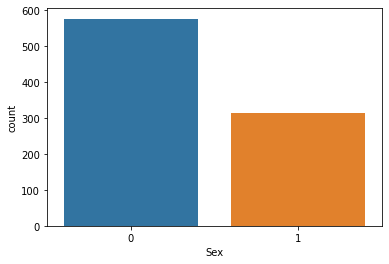

In [22]:
#Male-Female ratio in titanic
sns.countplot(x="Sex", data=trainData)

#### This implies that more women survived than men. This in turn implies that while rescuing priority first was given to women.

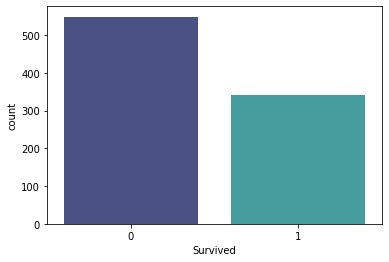

In [23]:
# Survived is denoted by 1.
sns.countplot(x='Survived', data=trainData, palette='mako')
plt.show()

#### This shows the number of people that survived and those who didn't.

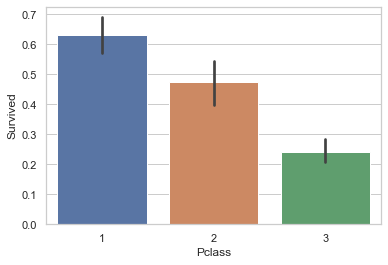

In [24]:
#It shows the distribution of people who travel in different ticket classes and their survival rates.
sns.set_theme(style="whitegrid")
sns.barplot(x='Pclass', y="Survived",data=trainData)
plt.show()

#### This shows that the people in 1st class had a greater probabilty of survival than 2nd class which had in turn greater probability of survival than 3rd class.
#### This implies that the people in 1st class were given more priority than 2nd class which were in turn prioritized than 3rd class travellers.

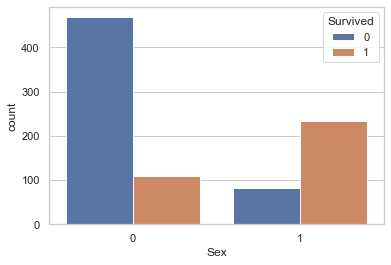

In [25]:
px = sns.countplot(x="Sex", hue="Survived", data=trainData)

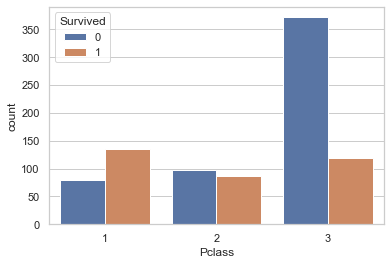

In [26]:
px = sns.countplot(x="Pclass", hue="Survived", data=trainData)

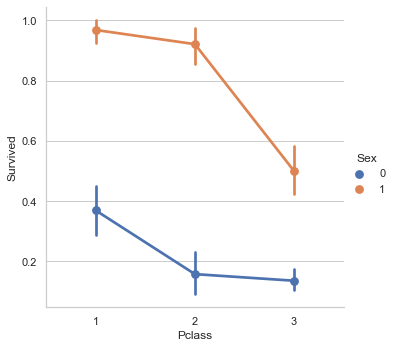

In [27]:
sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=trainData)

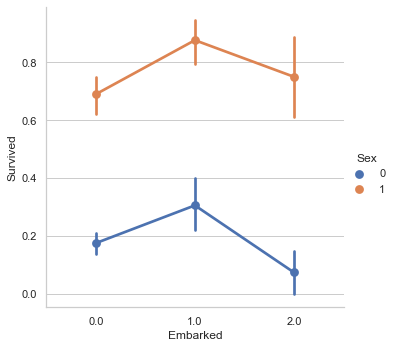

In [28]:
sns.factorplot(x="Embarked",y="Survived",hue="Sex",data=trainData)

In [29]:
trainData["Embarked"].unique()

array([ 0.,  1.,  2., nan])

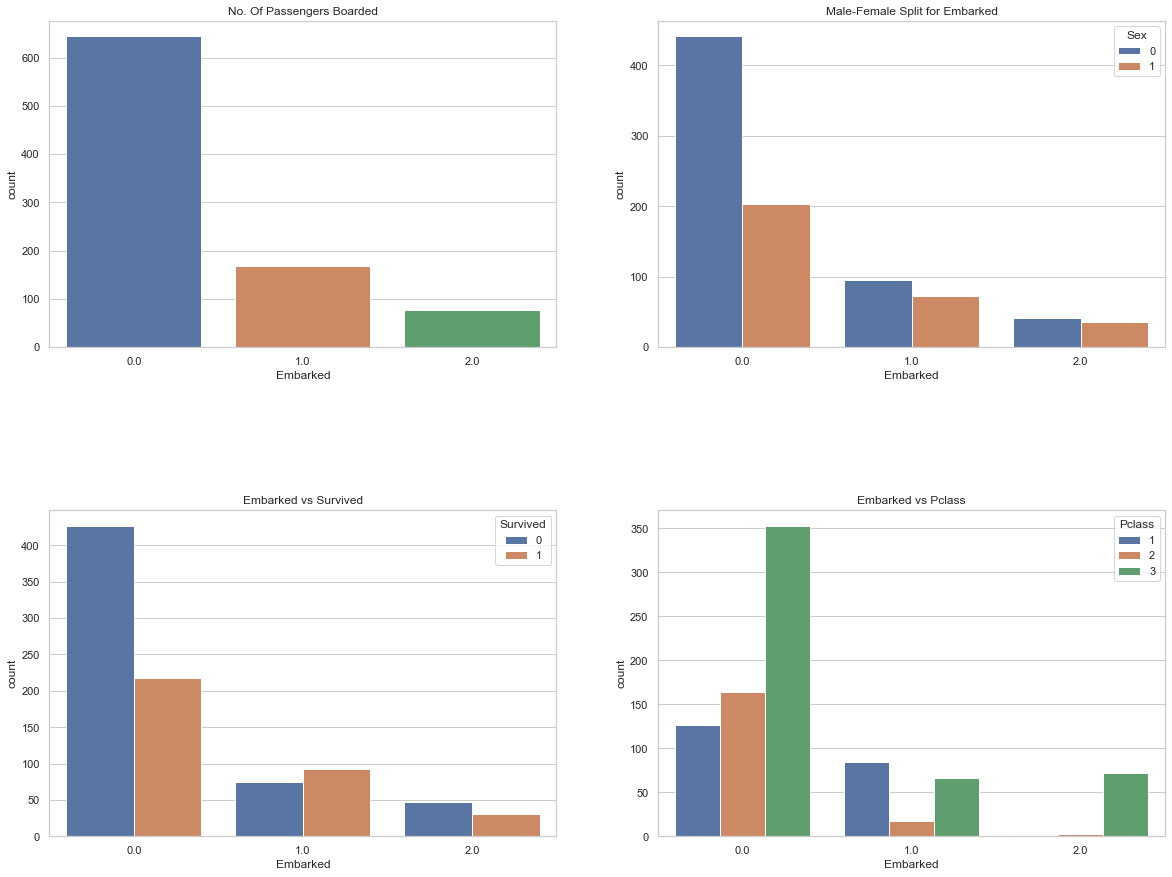

In [30]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=trainData,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=trainData,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=trainData,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=trainData,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations
#### 1. Maximum passenegers boarded from S. Majority of them being from Pclass3.
#### 2. Passengers boarding from C look lucky as major proportion of them survived.
#### 3. Embark S have good proportion of rich people(as majority of 1st class is from S) but still their survival rates are less because it also has the largest number of 3rd class passengers.

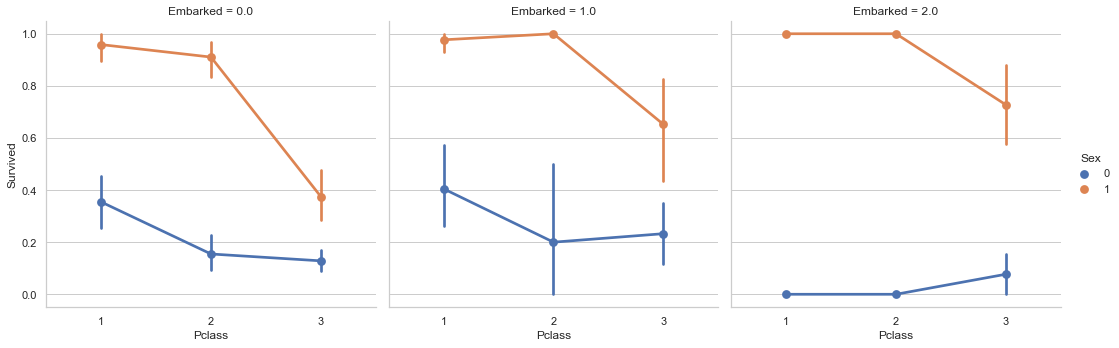

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=trainData)
plt.show()

### Observations
#### 1. Women in Pclass 1 and 2 are almost certain to survive.
#### 2. Embark S has the least collective survival rates for men and women taking 3rd class.

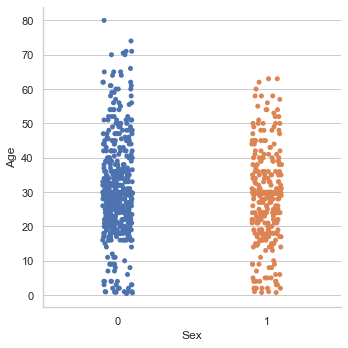

In [32]:
sns.catplot(x="Sex", y="Age", data=trainData)

#### Majority males travelling have ages between 18-40yrs whereas women are quite uniformly distributed all over.

### Data Preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
trainData.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0


In [35]:
trainData['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype  
--------------  -----  
889 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [36]:
#trainData.drop(columns = ["fare_stand"], inplace=True)

In [37]:
trainData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,0.0
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0.0
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0.0
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1.0


In [38]:
#correlation
trainData.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.118593
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.009499
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

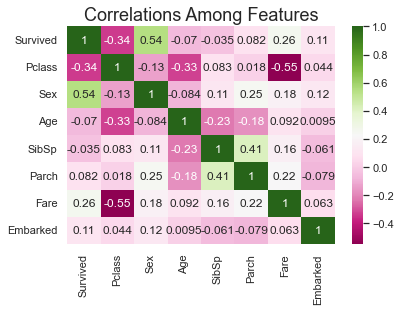

In [39]:
plt.subplot()
sns.heatmap(trainData.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

In [40]:
#preprocessing on train data.
preprocessedTrainData = trainData.copy()
 
col_names = ['Age', 'Fare']
features = preprocessedTrainData[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
preprocessedTrainData[col_names] = features

In [41]:
preprocessedTestData = testData.copy()
 
col_names = ['Age', 'Fare']
features = preprocessedTestData[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
preprocessedTestData[col_names] = features
print(preprocessedTestData)

     Pclass                                          Name  Sex       Age  \
0         3                              Kelly, Mr. James    0  0.334993   
1         3              Wilkes, Mrs. James (Ellen Needs)    1  1.325530   
2         2                     Myles, Mr. Thomas Francis    0  2.514175   
3         3                              Wirz, Mr. Albert    0 -0.259330   
4         3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1 -0.655545   
..      ...                                           ...  ...       ...   
413       3                            Spector, Mr. Woolf    0  0.000000   
414       1                  Oliva y Ocana, Dona. Fermina    1  0.691586   
415       3                  Saether, Mr. Simon Sivertsen    0  0.651965   
416       3                           Ware, Mr. Frederick    0  0.000000   
417       3                      Peter, Master. Michael J    0  0.000000   

     SibSp  Parch      Fare  Embarked  
0        0      0 -0.498407         2  
1      

In [42]:
trainData=preprocessedTrainData
testData=preprocessedTestData

In [43]:
preprocessedTrainData=preprocessedTrainData.drop('Name',axis=1)
preprocessedTestData=preprocessedTestData.drop('Name',axis=1)

In [44]:
preprocessedTrainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [45]:
mean_embarked=preprocessedTrainData["Embarked"].mean()
preprocessedTrainData["Embarked"].fillna(value=mean_embarked,inplace=True)

In [46]:
preprocessedTrainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
preprocessedTrainData.to_csv('preprocessed_train_data.csv', index=False)
preprocessedTestData.to_csv('preprocessed_test_data.csv', index=False)